<a href="https://colab.research.google.com/github/devpathak0212/Customer-Personality-Analysis/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In this project, we use several key libraries: `pandas` for data manipulation and analysis, allowing us to load and preprocess the dataset efficiently; `StandardScaler` from `sklearn.preprocessing` to normalize numerical features, ensuring consistent scaling across data points; `KMeans` from `sklearn.cluster` for clustering customers based on their characteristics; and `matplotlib.pyplot` along with `seaborn` for data visualization, helping us to create insightful plots and graphs to understand data distributions and clustering results.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading** **Dataset**

In this code, we load the marketing campaign dataset from a specified URL using `pandas` and display its first few rows to get an initial look at the data structure. The dataset is read with a semicolon (`;`) separator. We then use `data.describe()` to display summary statistics, providing insights into the central tendency, dispersion, and shape of the dataset's distribution, which helps in understanding the overall data quality and identifying any potential issues for further cleaning and preprocessing steps.

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv"
data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(data.head())

# Display the summary statistics and information about the dataset
# print(data.info())
print(data.describe())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

# **Data Cleaning**

In this section of the code, we handle data preprocessing by first removing any rows with missing values using `data.dropna()`. Next, we convert categorical columns (`Education` and `Marital_Status`) into numeric format using one-hot encoding, which creates binary columns for each category and drops the first category to avoid redundancy. We then convert the `Dt_Customer` column to datetime format and create a new column, `Customer_For`, representing the number of days each customer has been with the company. Finally, we drop the original `Dt_Customer` column and display the first few rows of the cleaned dataset to verify the changes.

In [ ]:
# Handle missing values
data = data.dropna()

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['Education', 'Marital_Status']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Convert date columns to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')

# Create a new column 'Customer_For' to show how long the customer has been with the company
data['Customer_For'] = (pd.to_datetime('today') - data['Dt_Customer']).dt.days

# Drop original date column
data = data.drop(['Dt_Customer'], axis=1)

# Display the cleaned data
print(data.head())


     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Education_Master  Education_PhD  \
0              546              172  ...             False          False   
1                6                2  ...             False          False   
2              127              111  ...             False          False   
3               20               10  ...             False          False   
4              118               46  ...             False           True   

   Marital_Status_Alone  Marital_Status_Divorced  

# **Analyze Customer Attitude**

In this part of the code, we analyze customer attitudes by summarizing the number of marketing offers each customer has accepted. We create a new feature, `Total_Accepted_Cmp`, which is the sum of the accepted offers across five different campaigns (`AcceptedCmp1` to `AcceptedCmp5`). This sum provides a comprehensive measure of each customer's engagement with the marketing campaigns. Finally, we use `data[['Total_Accepted_Cmp']].describe()` to generate summary statistics for this new feature, giving insights into the distribution of campaign acceptance among customers.

In [ ]:
# Attitudes: Summarize the number of accepted offers
attitude_features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data['Total_Accepted_Cmp'] = data[attitude_features].sum(axis=1)

# Summarize the data
print(data[['Total_Accepted_Cmp']].describe())


       Total_Accepted_Cmp
count         2216.000000
mean             0.298285
std              0.679209
min              0.000000
25%              0.000000
50%              0.000000
75%              0.000000
max              4.000000


# **Analyze Customer Behaviour**

In this segment of the code, we focus on analyzing customer behavior by summarizing the number of marketing offers each customer has accepted. We achieve this by creating a new feature, `Total_Accepted_Cmp`, which is the sum of the accepted offers across five different campaigns (`AcceptedCmp1` to `AcceptedCmp5`). This cumulative measure provides a clear view of customer engagement with the company's marketing efforts. We then use `data[['Total_Accepted_Cmp']].describe()` to generate summary statistics for this new feature, helping us understand the distribution and central tendencies of campaign acceptance among customers.

In [ ]:
# Behaviors: Summarize the amount spent on different products
behavior_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spent'] = data[behavior_features].sum(axis=1)

# Summarize the data
print(data[['Total_Spent']].describe())


       Total_Spent
count  2216.000000
mean    607.075361
std     602.900476
min       5.000000
25%      69.000000
50%     396.500000
75%    1048.000000
max    2525.000000


# **Feature Selection**

In this feature selection part of the code, we choose specific features for clustering customers: `Total_Accepted_Cmp`, `Total_Spent`, `Customer_For`, `Income`, and `Recency`. These features provide a comprehensive view of customer engagement, spending, loyalty, and demographics. We standardize these features using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1, making them comparable on the same scale. Then, we apply the KMeans clustering algorithm to segment the customers into four distinct groups based on these features. The `kmeans.cluster_centers_` function is used to display the centroids of these clusters, representing the average values of the features within each cluster.

In [ ]:
# Select features for clustering
features = ['Total_Accepted_Cmp', 'Total_Spent', 'Customer_For', 'Income', 'Recency']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster centroids
print(kmeans.cluster_centers_)


[[-0.24763504 -0.62335447 -0.14526968 -0.47343458 -0.92518116]
 [-0.05747092  1.04784903  0.20660752  0.78855229  0.06830926]
 [-0.30481616 -0.67419006 -0.05677805 -0.52302352  0.86918156]
 [ 3.21463891  1.54902817  0.02290977  1.27131531 -0.00978902]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# **Visual Representation**

In the visual representation and analysis part of the code, we create visualizations to better understand the customer segments identified through clustering. First, we use `sns.scatterplot` to plot a scatter plot of customers based on `Total_Spent` and `Total_Accepted_Cmp`, with different colors representing the clusters. This helps us visualize how spending and campaign acceptance vary across different customer segments. Next, we use `sns.countplot` to plot the distribution of customers across the clusters, showing the count of customers in each segment. These visualizations provide insights into the characteristics and distribution of the customer segments, aiding in further analysis and strategy development.

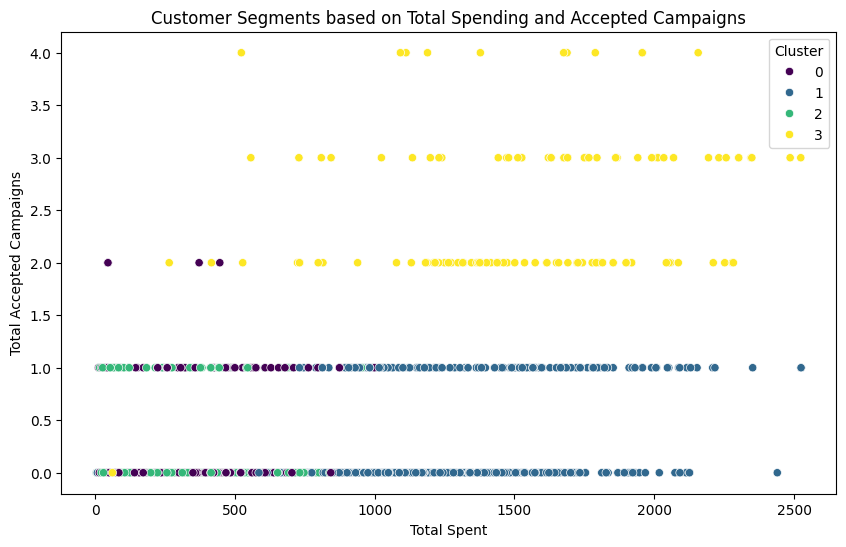

<ipython-input-7-98e3a8acc84f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette='viridis')


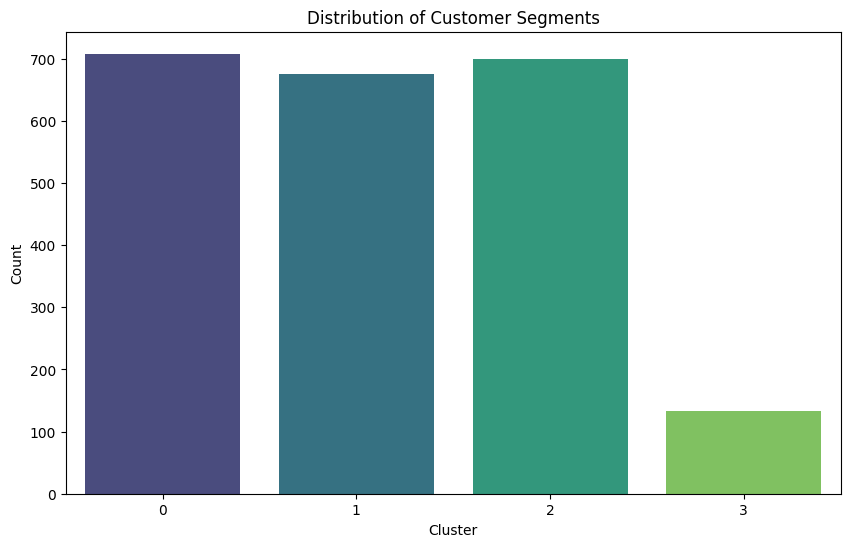

In [ ]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Spent', y='Total_Accepted_Cmp', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments based on Total Spending and Accepted Campaigns')
plt.xlabel('Total Spent')
plt.ylabel('Total Accepted Campaigns')
plt.show()

# Plot distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data, palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
